<img src='https://gazetadasemana.com.br/images/noticias/78040/30064552_altaLOGOS_.png.png' width=500>

# Artificial Neural Network with **real** oversampled data
Authorship: Raul Macedo

In [2]:
#General imports
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from utils import train_model_if_doesnt_exist,save_csv_if_doesnt_exist
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [3]:
train_fill_real1 = pd.read_csv('./oversampling/oversampling_with_real_data/train_real_filled_data1.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test_fill_real1 = pd.read_csv('./oversampling/oversampling_with_real_data/test_real_filled_data1.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
train_fill_real2 = pd.read_csv('./oversampling/oversampling_with_real_data/train_real_filled_data2.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test_fill_real2 = pd.read_csv('./oversampling/oversampling_with_real_data/test_real_filled_data2.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
train_fill_real3 = pd.read_csv('./oversampling/oversampling_with_real_data/train_real_filled_data3.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})
test_fill_real3 = pd.read_csv('./oversampling/oversampling_with_real_data/test_real_filled_data3.csv').drop(columns=['Unnamed: 0']).rename(columns={'0':'class'})

In [4]:
train_in1_real = train_fill_real1.drop(columns=['class']).copy()
test_in1_real = test_fill_real1.drop(columns=['class']).copy()
train_out1_real = pd.DataFrame(train_fill_real1['class'])
test_out1_real = pd.DataFrame(test_fill_real1['class'])

train_in2_real = train_fill_real2.drop(columns=['class']).copy()
test_in2_real =test_fill_real2.drop(columns=['class']).copy()
train_out2_real =pd.DataFrame(train_fill_real2['class'])
test_out2_real =pd.DataFrame(test_fill_real2['class'])

train_in3_real = train_fill_real3.drop(columns=['class']).copy()
test_in3_real =test_fill_real3.drop(columns=['class']).copy()
train_out3_real = pd.DataFrame(train_fill_real3['class'])
test_out3_real =pd.DataFrame(test_fill_real3['class'])

In [5]:

def normalize_data(data,range_=(0,1)):
  scaler = MinMaxScaler(feature_range=range_)
  return scaler.fit_transform(data),scaler


train_in1n,scaler_train_in1n = normalize_data(train_in1_real)
test_in1n,scaler_test_in1n = normalize_data(test_in1_real)
train_out1n,scaler_train_out1n = normalize_data(train_out1_real)
test_out1n,scaler_test_out1n = normalize_data(test_out1_real)

train_in2n,scaler_train_in2n = normalize_data(train_in2_real)
test_in2n,scaler_test_in2n = normalize_data(test_in2_real)
train_out2n,scaler_train_out2n = normalize_data(train_out2_real)
test_out2n,scaler_test_out2n = normalize_data(test_out2_real)

train_in3n,scaler_train_in3n = normalize_data(train_in3_real)
test_in3n,scaler_test_in3n = normalize_data(test_in3_real)
train_out3n,scaler_train_out3n = normalize_data(train_out3_real)
test_out3n,scaler_test_out3n = normalize_data(test_out3_real)


train_out1n_real = np.ravel(train_out1n)
train_out2n_real = np.ravel(train_out2n)
train_out3n_real = np.ravel(train_out3n)


## **Case 1: Using GridSearchCV to determine MLP parameters and train model**

In [6]:
parameters1 = {
    'hidden_layer_sizes': [(6,),(10,),(15,),(6,6),(6,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
ultron_real1 = train_model_if_doesnt_exist(train_in1n,train_out1n,parameters1,'./ann_models/after_data_filling/real_filled/ultron1_real1_PRP.pkl')

In [7]:
ultron_real1

MLPClassifier(activation='tanh', hidden_layer_sizes=(6, 4, 4), max_iter=100)

Text(0, 0.5, 'erro')

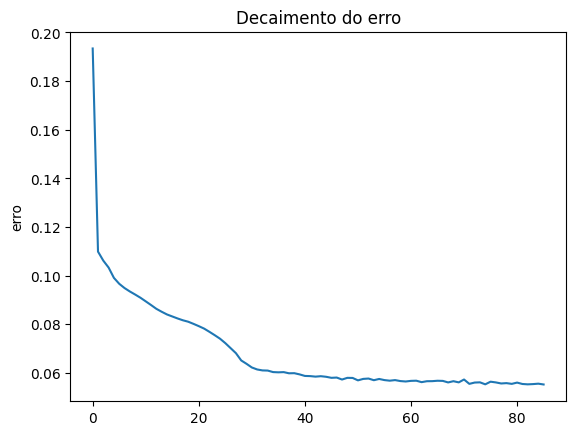

In [8]:
plt.plot(ultron_real1.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 1**

In [9]:
def plot_confusion_matrix(observed_data:np.ndarray,predicted_data:np.ndarray):
    sns.set(font_scale=2)
    mat = confusion_matrix(observed_data,predicted_data)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',linewidths=1)
    plt.xlabel('Observed')
    plt.ylabel('Predict')
    return

def save_classifaction_report(observed_data,predicted_data,file_name:str):
    cls_report = classification_report(observed_data,predicted_data,output_dict=True)
    cls_report_df = pd.DataFrame(cls_report)
    accuracy = accuracy_score(observed_data,predicted_data)
    cls_report_df['accuracy'] = accuracy
    save_csv_if_doesnt_exist(cls_report_df,file_name)
    print(cls_report_df)
    return

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.997969      0.945348  0.969726       0.971658       0.971220
recall         0.940341      0.998149  0.969726       0.969245       0.969726
f1-score       0.968298      0.971031  0.969726       0.969665       0.969687
support    95610.000000  98848.000000  0.969726  194458.000000  194458.000000


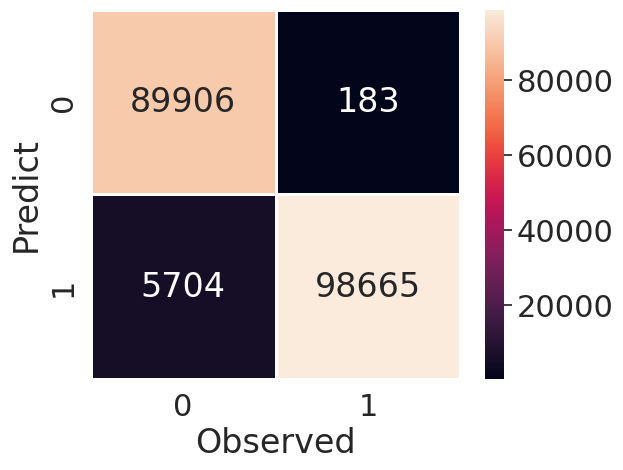

In [10]:
out1_pred = ultron_real1.predict(test_in1n)

out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_test_out1n.inverse_transform(out1_pred_df)

save_classifaction_report(test_out1_real,out_des_pred1,'./ann_models/after_data_filling/real_filled/reports/ultron_real1_test_report.csv')

plot_confusion_matrix(test_out1_real,out_des_pred1)

### **Analising model with train data - case 1**

                     0.0            5.0  accuracy      macro avg  \
precision       0.997941       0.945329   0.96983       0.971635   
recall          0.940862       0.998106   0.96983       0.969484   
f1-score        0.968561       0.971001   0.96983       0.969781   
support    224120.000000  229615.000000   0.96983  453735.000000   

            weighted avg  
precision       0.971317  
recall          0.969830  
f1-score        0.969796  
support    453735.000000  


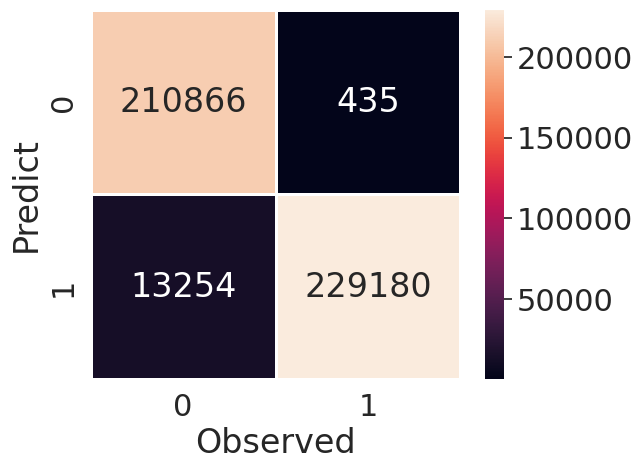

In [11]:
out1_pred = ultron_real1.predict(train_in1n)

out1_pred_df = pd.DataFrame(out1_pred)
out_des_pred1 = scaler_train_out1n.inverse_transform(out1_pred_df)


save_classifaction_report(train_out1_real,out_des_pred1,'./ann_models/after_data_filling/real_filled/reports/ultron_real1_train_report.csv')
plot_confusion_matrix(train_out1_real,out_des_pred1)


# **Case 2 - Taking away T-TPT & P-MON-CKP**
## **Using GridSearchCV to determine MLP parameters and train model - Case 2**

In [12]:
parameters2 = {
    'hidden_layer_sizes': [(4,),(10,),(15,),(4,6),(4,4,4)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

ultron_real2 = train_model_if_doesnt_exist(train_in2n,train_out2n,parameters2,'./ann_models/after_data_filling/real_filled/ultron2_real2_PRP.pkl')

In [13]:
ultron_real2

MLPClassifier(activation='tanh', hidden_layer_sizes=(4, 4, 4), max_iter=100)

In [14]:
ultron_real2.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (4, 4, 4),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0, 0.5, 'erro')

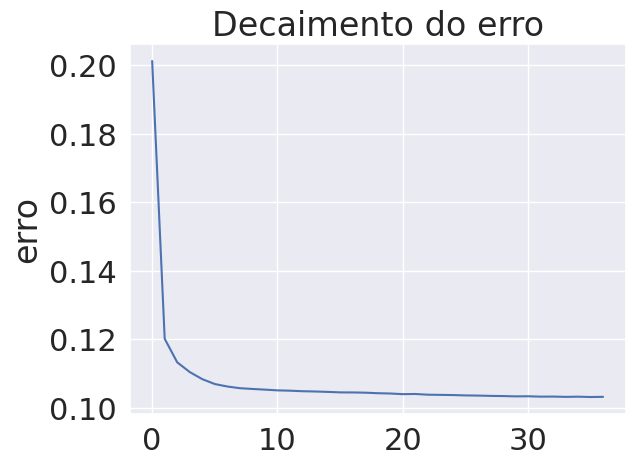

In [15]:
plt.plot(ultron_real2.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 2**

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.998579      0.929104  0.960788       0.963842       0.963423
recall         0.921931      0.998720  0.960788       0.960325       0.960788
f1-score       0.958726      0.962655  0.960788       0.960690       0.960714
support    96056.000000  98402.000000  0.960788  194458.000000  194458.000000


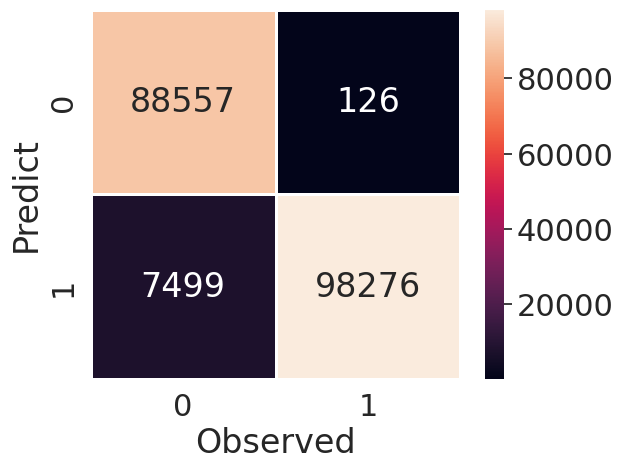

In [16]:
out2_pred = ultron_real2.predict(test_in2n)

out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_test_out2n.inverse_transform(out2_pred_df)

save_classifaction_report(test_out2_real,out_des_pred2,'./ann_models/after_data_filling/real_filled/reports/ultron_real2_test_report.csv')
plot_confusion_matrix(test_out2_real,out_des_pred2)

### **Analising model with train data - case 2**


                     0.0            5.0  accuracy      macro avg  \
precision       0.998580       0.931381  0.962044       0.964980   
recall          0.924318       0.998722  0.962044       0.961520   
f1-score        0.960015       0.963877  0.962044       0.961946   
support    223674.000000  230061.000000  0.962044  453735.000000   

            weighted avg  
precision       0.964507  
recall          0.962044  
f1-score        0.961973  
support    453735.000000  


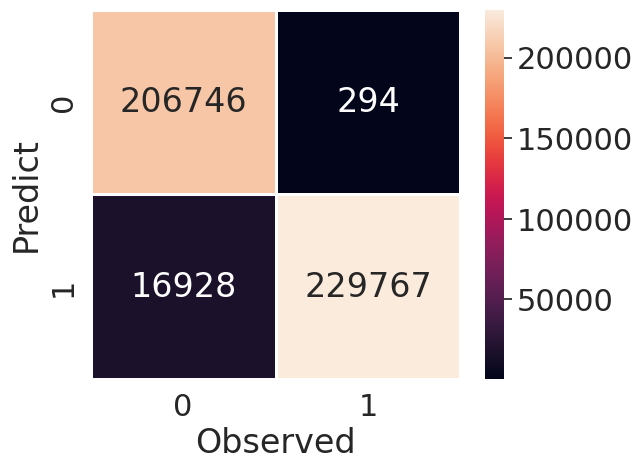

In [17]:
out2_pred = ultron_real2.predict(train_in2n)

out2_pred_df = pd.DataFrame(out2_pred)
out_des_pred2 = scaler_train_out2n.inverse_transform(out2_pred_df)

save_classifaction_report(train_out2_real,out_des_pred2,'./ann_models/after_data_filling/real_filled/reports/ultron_real2_train_report.csv')
plot_confusion_matrix(train_out2_real,out_des_pred2)

# Case 3: Desconsiderando P-TPT e P-MON-CKP
### **Definindo parâmetros da rede com GridSearch - Caso 3**

In [18]:
ultron_real3 = train_model_if_doesnt_exist(train_in3n,train_out3n,parameters2,'./ann_models/after_data_filling/real_filled/ultron3_real3_PRP.pkl')

In [19]:
ultron_real3

MLPClassifier(activation='tanh', hidden_layer_sizes=(10,),
              learning_rate='adaptive', max_iter=100)

In [20]:
ultron_real3.get_params()

{'activation': 'tanh',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

Text(0, 0.5, 'erro')

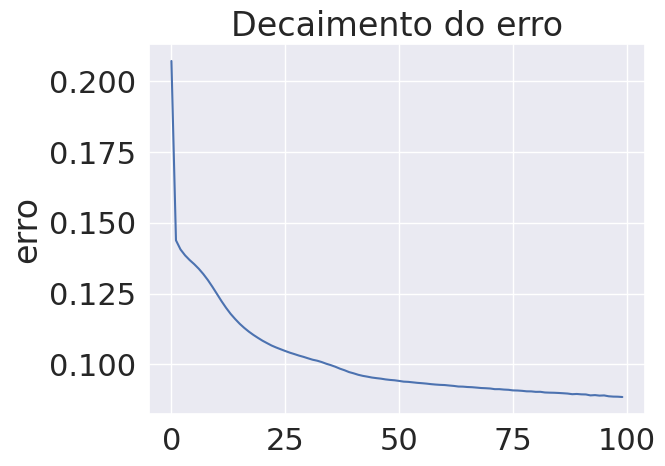

In [21]:
plt.plot(ultron_real3.loss_curve_)
plt.title('Decaimento do erro')
plt.ylabel('erro')

### **Analising model with test data - case 3**

                    0.0           5.0  accuracy      macro avg   weighted avg
precision      0.998382      0.934877  0.963936       0.966630       0.966132
recall         0.928227      0.998542  0.963936       0.963385       0.963936
f1-score       0.962027      0.965661  0.963936       0.963844       0.963873
support    95705.000000  98753.000000  0.963936  194458.000000  194458.000000


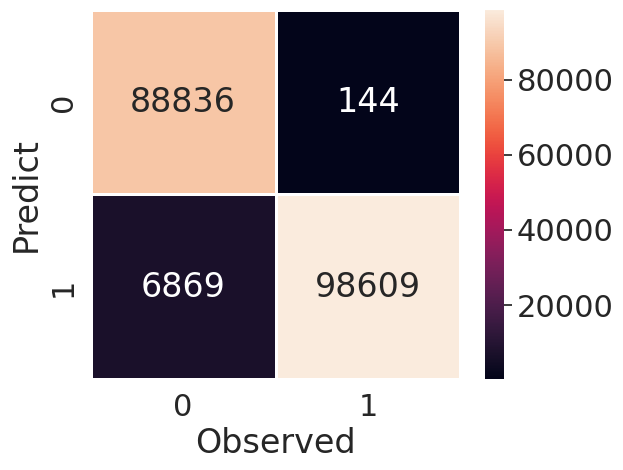

In [22]:
out3_pred = ultron_real3.predict(test_in3n)

out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_test_out3n.inverse_transform(out3_pred_df)

save_classifaction_report(test_out3_real,out_des_pred3,'./ann_models/after_data_filling/real_filled/reports/ultron_real3_test_report.csv')
plot_confusion_matrix(test_out3_real,out_des_pred3)



### **Analising model with train data - case 3**

                     0.0            5.0  accuracy      macro avg  \
precision       0.998281       0.934209  0.963613       0.966245   
recall          0.927901       0.998442  0.963613       0.963171   
f1-score        0.961805       0.965258  0.963613       0.963531   
support    224025.000000  229710.000000  0.963613  453735.000000   

            weighted avg  
precision       0.965843  
recall          0.963613  
f1-score        0.963553  
support    453735.000000  


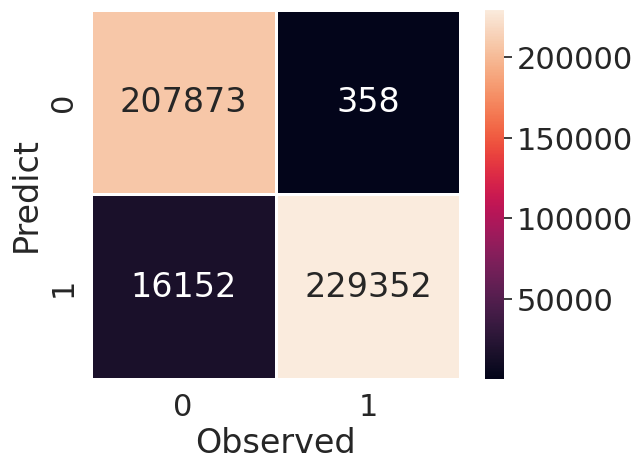

In [23]:
out3_pred = ultron_real3.predict(train_in3n)

out3_pred_df = pd.DataFrame(out3_pred)
out_des_pred3 = scaler_train_out3n.inverse_transform(out3_pred_df)

save_classifaction_report(train_out3_real,out_des_pred3,'./ann_models/after_data_filling/real_filled/reports/ultron_real3_train_report.csv')
plot_confusion_matrix(train_out3_real,out_des_pred3)

# ROC Curve

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score


In [25]:
y_pred_prob_ultron1 = ultron_real1.predict_proba(test_in1n)[:, 1]
y_pred_prob_ultron2 = ultron_real2.predict_proba(test_in2n)[:, 1]
y_pred_prob_ultron3 = ultron_real3.predict_proba(test_in3n)[:, 1]

In [26]:
fpr1, tpr1, thresholds1 = roc_curve(test_out1n, y_pred_prob_ultron1)  
roc_auc1 = roc_auc_score(test_out1n, y_pred_prob_ultron1)  

fpr2, tpr2, thresholds2 = roc_curve(test_out2n, y_pred_prob_ultron2)
roc_auc2 = roc_auc_score(test_out2n, y_pred_prob_ultron2) 

fpr3, tpr3, thresholds3 = roc_curve(test_out3n, y_pred_prob_ultron3)
roc_auc3 = roc_auc_score(test_out3n, y_pred_prob_ultron3) 

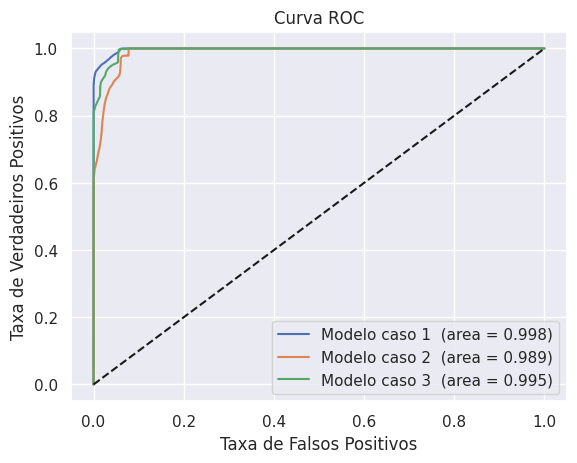

In [27]:
sns.set(font_scale=1)

plt.plot(fpr1, tpr1, label=f'Modelo caso 1  (area = {round(roc_auc1,3)})')
plt.plot(fpr2, tpr2, label=f'Modelo caso 2  (area = {round(roc_auc2,3)})')
plt.plot(fpr3, tpr3, label=f'Modelo caso 3  (area = {round(roc_auc3,3)})')
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show() 
